### Исследование продаж компьютерных игр

Описание проекта: Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Цель исследования: выявить закономерности успешности игры, для последующего выпуска игры.

Ход исследования: 
1. Открыть датасет и посмотреть общую информацию
2. Предобработка данных
3. Исследовательский анализ
4. Портрет пользователя для каждого региона
5. Проверка гипотез
6. Общий вывод

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Обзор данных

In [172]:
#импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings

In [173]:
#открываем и сохраняем датасет:
try:
    # я
    data = pd.read_csv('C:/Users/School252/Downloads/games.csv') 
except:
    # ревьюер
    data = pd.read_csv('/datasets/games.csv')

In [174]:
# общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [175]:
data.shape

(16715, 11)

In [176]:
# функция для просмотра пропущенных значений
def nan_values(df_data):
    data = df_data
    count_missing = data.isna().sum()
    percent_missing = round(data.isna().sum() * 100 / len(data), 2)
    
    missing_value_df = pd.DataFrame({'column_name': data.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_df

In [177]:
# вызываем функцию
nan_values(data)

,column_name,num_missing,percent_missing
Name,Name,2,0.01
Platform,Platform,0,0.00
Year_of_Release,Year_of_Release,269,1.61
Genre,Genre,2,0.01
NA_sales,NA_sales,0,0.00
EU_sales,EU_sales,0,0.00
JP_sales,JP_sales,0,0.00
Other_sales,Other_sales,0,0.00
Critic_Score,Critic_Score,8578,51.32
User_Score,User_Score,6701,40.09


Больше всего пропущенных значений в 3 последних столбцах. Оценка пользователя, критика и рейтинг от организации. Это может быть связано с тем, что не все пользователи высавляли оценку игре. Из-за этого не выставляется и рейтинг.

In [178]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Вывод по разделу 1: необходимо привести все названия к нижнему регистру, изменить типы данных там где это необходимо, поработать с пропусками.

### Предобработка данных

In [179]:
# нижний регистр
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Столбец name и genre

In [180]:
# пропуски
print('Количество пропусков:', data['name'].isna().sum())

Количество пропусков: 2


In [181]:
# пропуски
print('Количество пропусков:', data['genre'].isna().sum())

Количество пропусков: 2


In [182]:
# срез чтобы увидеть эти строки в таблице
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как пропущены значения не только name, но и genre. Эти значения не повлияют на исследование, поэтому можем их удалить

In [183]:
# удаляем значения
data.drop(index = [659, 14244], inplace = True)
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Вывод: удалили 2 столбца с пропусками

Столбец platform

In [184]:
# пропуски
print('Количество пропусков:', data['platform'].isna().sum())

Количество пропусков: 0


In [185]:
# уникальные значения
print('Уникальные значения:\n', data['platform'].value_counts())

Уникальные значения:
 PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


Вывод: в данном столбце проблем нет

Столбец year_of_release

In [186]:
# тип данных
data['year_of_release'].dtypes

dtype('float64')

In [187]:
# уникальные значения
print('Уникальные значения:\n', data['year_of_release'].value_counts())

Уникальные значения:
 2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64


In [188]:
# пропуски
print('Количество пропусков:', data['year_of_release'].isna().sum())

Количество пропусков: 269


Так как год выпуска игры влияет на дальнейшее исследование. Эти столбцы необходимо удалить

In [189]:
# удаляем пропуски
data.dropna(subset=['year_of_release'], inplace = True)
data['year_of_release'].isna().sum()

0

Также необходимо поменять тип данных на int, потому что нам достаточно знать только год выпуска игры

In [190]:
data['year_of_release'] = data['year_of_release'].astype('int')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Вывод: удалил строки которые нельзя заменить и поменял тип данных

Столбцы na_sales, eu_sales, jp_sales, other_sales

In [191]:
# тип данных
data['na_sales'].dtypes

dtype('float64')

In [192]:
# уникальные значения
data['na_sales'].value_counts()

0.00     4449
0.02      562
0.03      554
0.04      543
0.05      536
         ... 
5.39        1
3.03        1
3.56        1
2.82        1
41.36       1
Name: na_sales, Length: 401, dtype: int64

In [193]:
# пропуски
data['na_sales'].isna().sum()

0

In [194]:
# тип данных
data['eu_sales'].dtypes

dtype('float64')

In [195]:
# уникальные значения
data['eu_sales'].value_counts()

0.00     5766
0.01     1467
0.02     1290
0.03      911
0.04      702
         ... 
1.52        1
5.75        1
2.17        1
2.78        1
28.96       1
Name: eu_sales, Length: 307, dtype: int64

In [196]:
# пропуски
data['eu_sales'].isna().sum()

0

In [197]:
# тип данных
data['jp_sales'].dtypes

dtype('float64')

In [198]:
# уникальные значения
data['jp_sales'].value_counts()

0.00    10300
0.02      733
0.01      697
0.03      540
0.04      391
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: jp_sales, Length: 244, dtype: int64

In [199]:
# пропуски
data['jp_sales'].isna().sum()

0

In [200]:
# тип данных
data['other_sales'].dtypes

dtype('float64')

In [201]:
# уникальные значения
data['other_sales'].value_counts()

0.00    6492
0.01    3398
0.02    1596
0.03     910
0.04     641
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: other_sales, Length: 155, dtype: int64

In [202]:
# пропуски
data['other_sales'].isna().sum()

0

Вывод: в данных столбцах нет необходимости вносить изменения на этапе предобработки

Столбец critic_score

In [203]:
# тип данных
data['critic_score'].dtypes

dtype('float64')

In [204]:
# уникальные значения
data['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
20.0      3
29.0      3
21.0      1
17.0      1
13.0      1
Name: critic_score, Length: 81, dtype: int64

In [205]:
# пропуски
data['critic_score'].isna().sum()

8461

Так как замена пропусков может исказить дальнейшее исследование. Оставим эти пропуски без изменений

Столбец user_score

In [206]:
# тип данных
data['user_score'].dtypes

dtype('O')

In [207]:
# уникальные значения
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [208]:
# пропуски
data['user_score'].isna().sum()

6605

Значение tbd не очень понятно, что означает. Поэтому для удобства работы с данными заменим эти значения на nan

In [209]:
# заменим зачения
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

In [210]:
# проверяем
data['user_score'].value_counts()

7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
1.5      2
0.3      2
1.1      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [211]:
# меняю тип данных
data['user_score'] = data['user_score'].astype(float)

Вывод: заменил значения на nan, а пропуски оставил без изменений, чтобы не исказить анализ. Также поменял тип данных на float

Столбец rating

In [212]:
# тип данных
data['rating'].dtypes

dtype('O')

In [213]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [214]:
# пропуски
data['rating'].isna().sum()

6676

Пропуски можно заменить на no rating

In [215]:
# заменим значения
data['rating'] = data['rating'].fillna('no rating')

In [216]:
# проверим
data['rating'].value_counts()

no rating    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: rating, dtype: int64

Вывод: заменил пропущенные значения на no rating

Проверим на явные дубликаты

In [217]:
data.duplicated().sum()

0

Дубликатов не найдено

Запишем в столбец total_sales продажи по всем регионам

In [218]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [219]:
# проверим
data['total_sales'].head()

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

Вывод по разделу 2:
- привел столбцы к нижнему регистру
- проверил пропуски
- изменил типы данных
- заменил значение user_score tbd
- сохранил суммарные продажи в total_sales


### Исследовательский анализ данных

Проверим, сколько игр выпускалось за разные годы

In [220]:
# группируем по году выпуска с функ count
game_year = data.groupby('year_of_release')['name'].agg('count').reset_index()
game_year.columns = ['year_of_release', 'count_of_games']
game_year

,year_of_release,count_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Строим график для наглядности

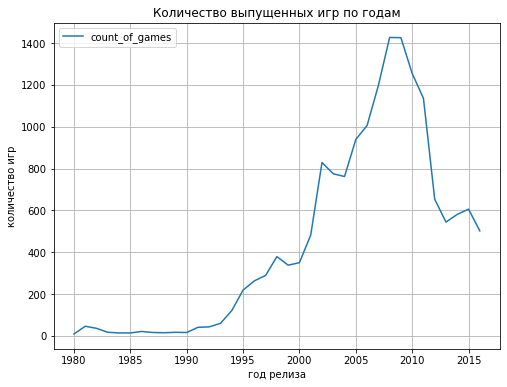

In [221]:
game_year.plot(x = 'year_of_release', 
                    y = 'count_of_games', 
                    grid = True, 
                    title ='Количество выпущенных игр по годам',
                    figsize = (8,6)).set(xlabel='год релиза', ylabel='количество игр');


По данному графику можно увидеть, что рост количества выпущенных игр начинается с 1994 года. Это может быть связано с вводом игровых приставок и компьютеров у обычного населения. Самое большое количество можно увидеть с 2008 по 2009 год. Дальнейший спад можно охарактеризовать, растущими запросами и качественными потребностями у людей. Соответсвенно, на разработку тратят больше времени и денег. 
Таким образом данные до 90-ых годов можно не использовать в анализе

In [222]:
data = data.query('year_of_release > 1990')
data['year_of_release'].min()

1991

Посмотрим, сколько игр выходило и на каие платформы было больше всего продаж

In [223]:
# сгруппируем игры по платформам и посмотрим кол-во игр выпущенных для опр. платформ
platform_count = data.groupby('platform')['total_sales'].agg(['count']).sort_values(
by='count', ascending=False).reset_index()

platform_count.columns = ['platform', 'platform_count']
platform_count

,platform,platform_count
0,PS2,2127
1,DS,2120
2,PS3,1306
3,Wii,1286
4,X360,1232
5,PSP,1193
6,PS,1190
7,PC,955
8,GBA,811
9,XB,803


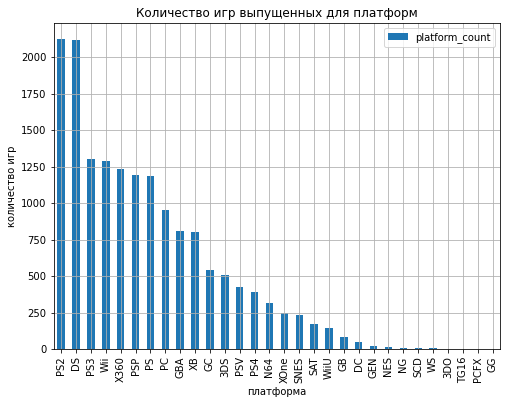

In [224]:
platform_count.plot.bar(x = 'platform', 
                    y = 'platform_count', 
                    grid = True, 
                    title ='Количество игр выпущенных для платформ',
                    figsize = (8,6)).set(xlabel='платформа', ylabel='количество игр');

In [225]:
platform_sum = data.groupby('platform')['total_sales'].agg(['sum']).sort_values(
by='sum', ascending=False).reset_index()

platform_sum.columns = ['platform', 'platform_sum']
platform_sum

,platform,platform_sum
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


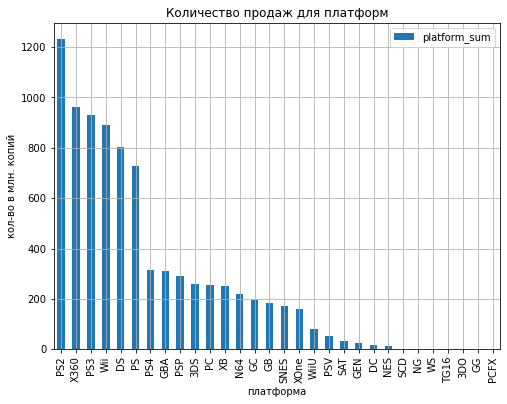

In [226]:
platform_sum.plot.bar(x = 'platform', 
                    y = 'platform_sum', 
                    grid = True, 
                    title ='Количество продаж для платформ',
                    figsize = (8,6)).set(xlabel='платформа', ylabel='кол-во в млн. копий');

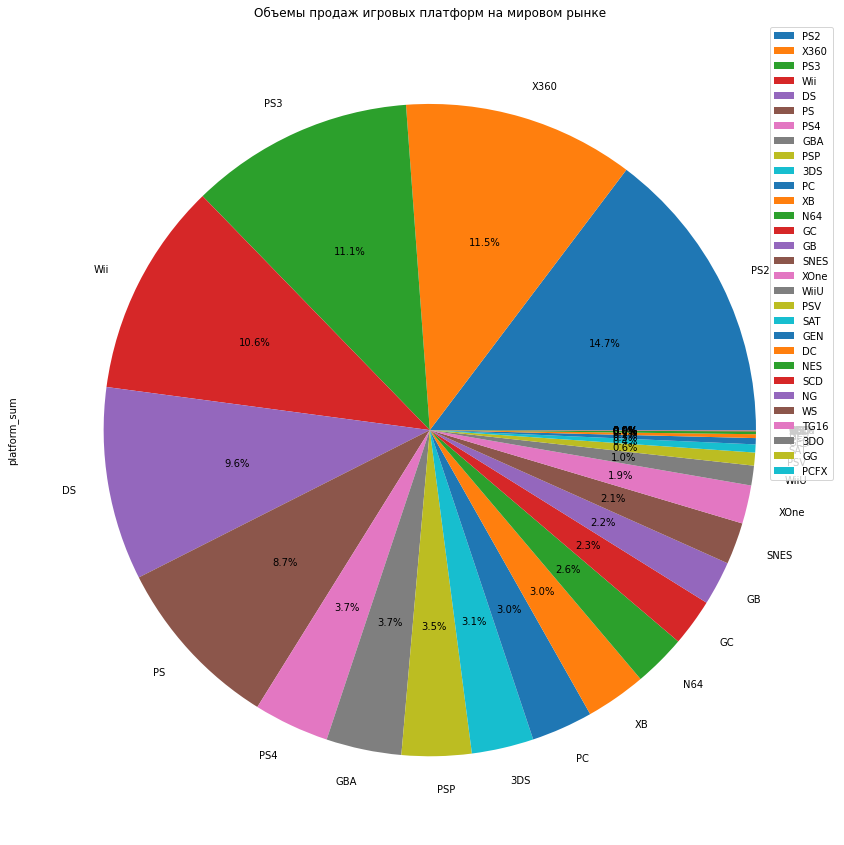

In [227]:
# доля продаж между всеми платформами
platform_sum.plot(kind = 'pie', 
                  y ='platform_sum', 
                  autopct='%1.1f%%', 
                  figsize= (15,15),
                  title = 'Объемы продаж игровых платформ на мировом рынке', 
                  labels = platform_sum['platform']
                  );

Исходя из 2 графиков и круговой диаграммы, можно увидеть:
- ТОП 5: PS2, X360, PS3, WII, DS
- ТОП 3: Sony, Microsoft, Nintendo

Проведем анализ ТОП 5 платформ

In [228]:
# выделим топ 5
top_platforms = platform_sum.head(5)['platform']
top_platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
Name: platform, dtype: object

In [229]:
# группирую по годам выпуска игр
top = data.query('platform in @top_platforms').pivot_table(
                                                           index='year_of_release', 
                                                           columns = 'platform', 
                                                           values = 'total_sales', 
                                                           aggfunc = 'sum'
                                                           )
top

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41
2008,145.31,53.90,118.52,171.32,135.26


In [230]:
top.describe()

platform,DS,PS2,PS3,Wii,X360
count,10.000000,12.000000,11.000000,11.000000,12.000000
mean,80.276000,102.796667,84.667273,81.016364,80.103333
std,59.796231,79.405729,54.637565,79.136330,57.484408
min,1.540000,0.450000,3.600000,0.180000,1.520000
25%,19.497500,35.977500,34.360000,6.170000,29.045000
50%,102.280000,89.705000,107.360000,59.650000,91.995000
75%,127.557500,170.900000,124.725000,144.960000,124.032500
max,146.940000,211.810000,156.780000,206.970000,170.030000


Визуализирую результаты

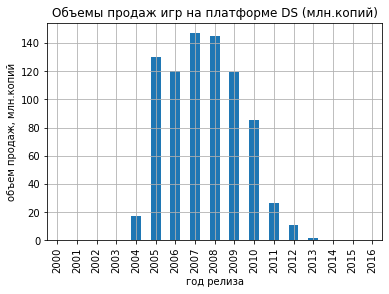

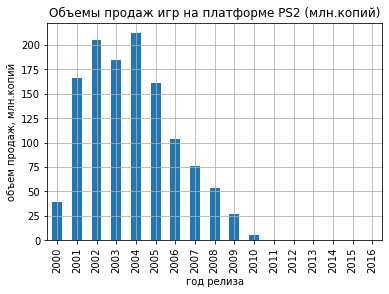

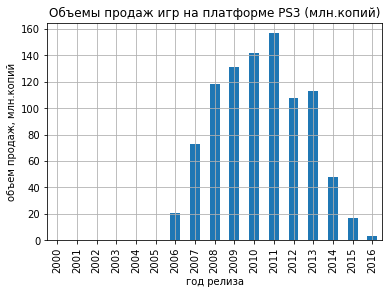

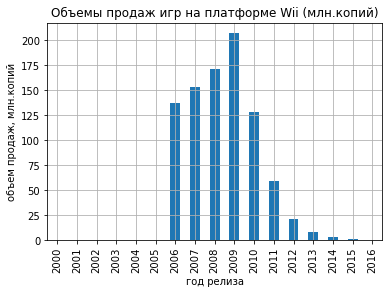

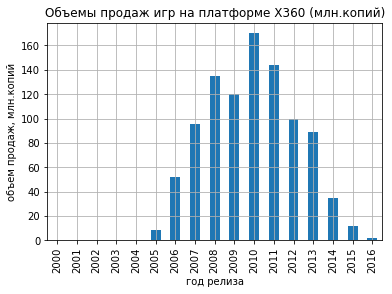

In [231]:
for name in top:
    top[name].plot.bar(
                   x = 'year_of_release', 
                   y = 'total_sales', 
                   grid=True, 
                   title=f'Объемы продаж игр на платформе {name} (млн.копий)'
                   ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий');
    plt.show()

На каждом графике отчётливо видно, момент популярности и постепенного спада. Хотя у компании Nintendo самые резкие темпы

In [232]:
#средний срок жизни
sum_pl = 0
count_pl = 0
for name in top.columns:
    sum_pl += top.loc[top[name].notna(), name].count()
    count_pl += 1
print('Среднее время жизни консоли', sum_pl/count_pl)

Среднее время жизни консоли 11.2


Вывод: как обычно и бывает одно поколение консолей длится 10 лет. В случае с nintendo, объемы продаж резко высокие по причине большого кол-ва пользователей из-за доступной цены. Видна закономерность пик через 5 лет после выпуска, затем спад, который дляится 4-5 лет.

Для построения прогноза, необходимо понять поведение успешных консолей. Скорее всего, перспективная консоль, будет дольше выживать в рамках высокой конкуренции. Предположим, что актуальные данные будут представлены с 2010 по 2016.

In [233]:
# для работы сохраним в data_actual данные для работы
data_actual = data.query('year_of_release >= 2014')
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98


Актуальными данными я выбрал с 2014 по 2016 годы

Необходимо выделить актуальные платформы, которые еще играбельны в 2016 году

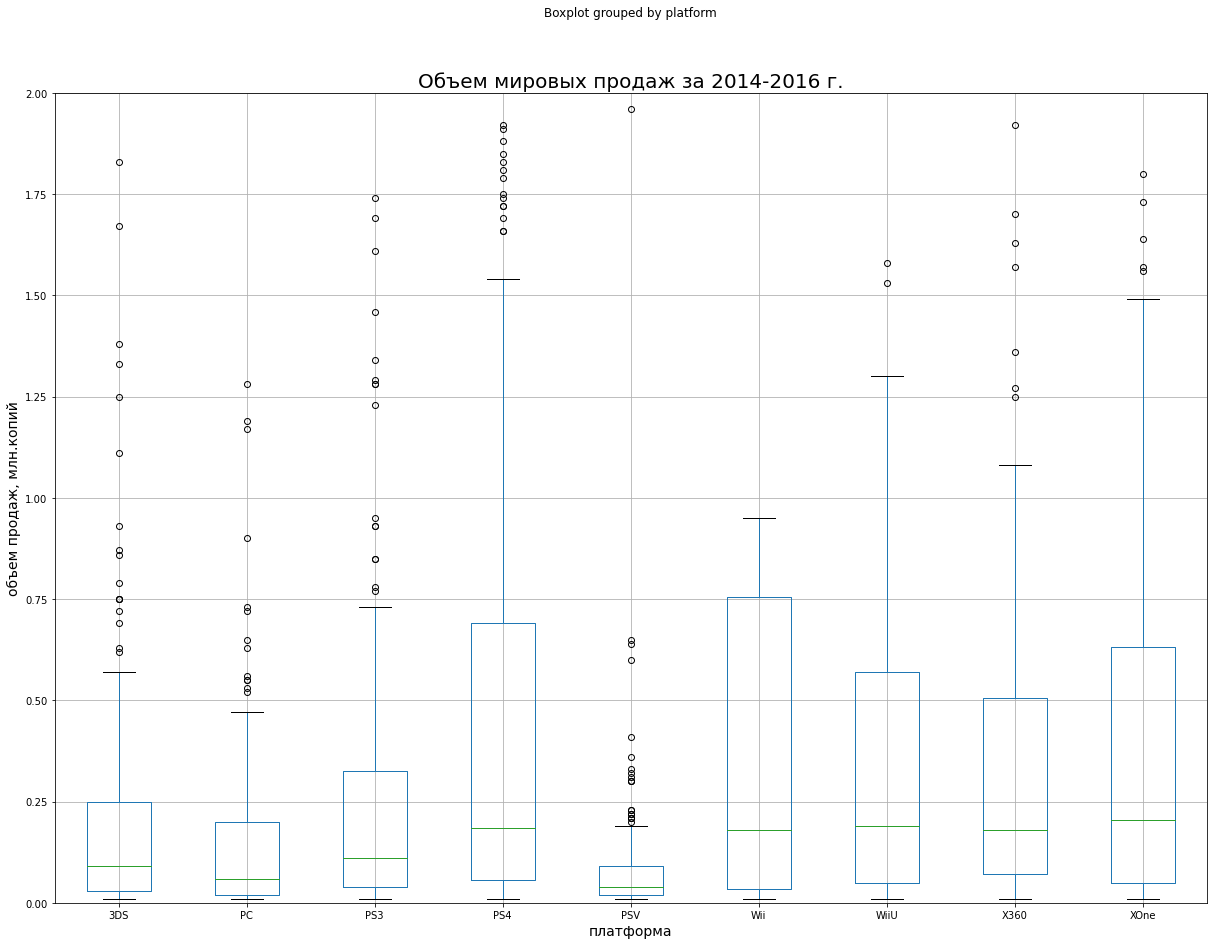

In [234]:
actual_consol = ['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

data_actual.query('platform in @actual_consol').boxplot(
                                                        column='total_sales', 
                                                        by='platform', 
                                                        figsize=(20, 15)
                                                        ).set(ylim=(0,2))
plt.title('Объем мировых продаж за 2014-2016 г.', size=20)
plt.xlabel('платформа', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()

По данной диаграмме можно увидеть распределение продаж между платформами. Естествено PS и Xbox являются лидерами, за счёт выпуска игр внутренними студиями и большого спроса у людей. У nintendo тоже есть свои покупатели. Очень странно, что на PC количество продаж на таком невысоком уровне

Далее посмотрим суммарные продажи для актуальных платформ, а потом по сводной таблице строим линейный график, чтобы увидеть в каком положении находятся платформы

In [235]:
data_actual_pivot = data_actual.query('platform in @actual_consol').pivot_table(
                       index='year_of_release', columns = 'platform', 
                       values = 'total_sales', aggfunc = 'sum')
data_actual_pivot

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


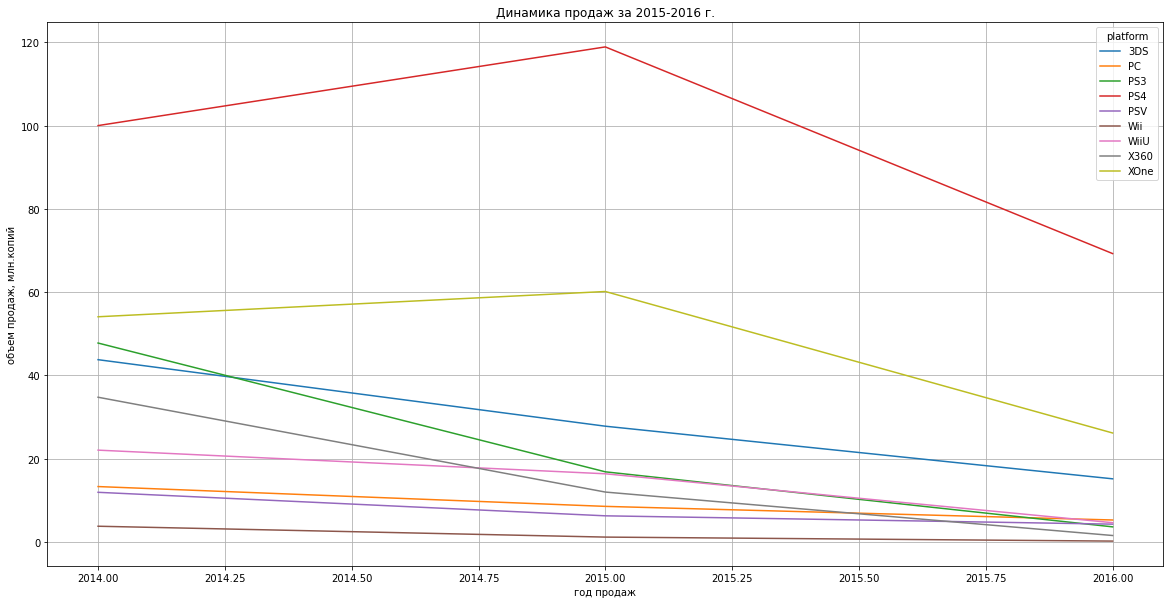

In [236]:
data_actual_pivot.plot(grid=True, 
                     figsize=(20, 10), 
                     title = 'Динамика продаж за 2015-2016 г.').set(
                     xlabel = 'год продаж', 
                     ylabel = 'объем продаж, млн.копий');

In [237]:
data_actual_pivot.describe()

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,28.893333,9.016667,22.726667,96.050000,7.466667,1.690000,14.326667,16.073333,46.786667
std,14.342445,4.037974,22.664795,25.059579,3.967472,1.847458,8.889411,16.987694,18.127748
min,15.140000,5.250000,3.600000,69.250000,4.250000,0.180000,4.600000,1.520000,26.150000
25%,21.460000,6.885000,10.210000,84.625000,5.250000,0.660000,10.475000,6.740000,40.110000
50%,27.780000,8.520000,16.820000,100.000000,6.250000,1.140000,16.350000,11.960000,54.070000
75%,35.770000,10.900000,32.290000,109.450000,9.075000,2.445000,19.190000,23.350000,57.105000
max,43.760000,13.280000,47.760000,118.900000,11.900000,3.750000,22.030000,34.740000,60.140000


По графику видно, что все платформы в упадке. Кроме PS4, XOne и 3DS. Это связано с тем, что это самые свежие консоли. То есть, большое кол-во людей еще не успело перейти на новое поколение. А из-за этого разработчики продолжают выпускать кросгенные игры. Консолей, которые показывают перспективы роста к 2016 году, к сожалению нет. Поэтому остановимся на этих 3 консолях.

Вывод: мы нашли 3 консоли, на которые можно сделать ставку, потому что у них наибольшее кол-во продаж. На данный момент нельзя выделить потенциально прибыльные консоли, так как они уже показывают спад, по продажам.

Посмторим, коэффицинт корреляции по консолям. По сводной таблице c продажами и суммой

In [288]:
# построим сводную таблицу значения коэффициента коррелияции на разных консолях
actual_consol_corr = platform_count.query('platform in @actual_consol')
actual_consol_corr['user_corr'] = 0
actual_consol_corr['critic_corr'] = 0

#рассчитаем коэффициент корреляции
for name in actual_consol_corr['platform']:
    actual_consol_corr.loc[actual_consol_corr['platform'] == name,['user_corr']] = data_actual.query(
                 'platform == @name')['total_sales'].corr(data_actual.query('platform == @name')['user_score']).round(3)
    
    actual_consol_corr.loc[actual_consol_corr['platform'] == name,['critic_corr']] = data_actual.query(
                 'platform == @name')['total_sales'].corr(data_actual.query('platform == @name')['critic_score'])
actual_consol_corr

C:\Users\School252\AppData\Local\Temp\ipykernel_13004\1201288808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_consol_corr['user_corr'] = 0
C:\Users\School252\AppData\Local\Temp\ipykernel_13004\1201288808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_consol_corr['critic_corr'] = 0
C:\Users\School252\AppData\Local\Temp\ipykernel_13004\1201288808.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,platform,platform_count,user_corr,critic_corr
2,PS3,1306,-0.167,0.446575
3,Wii,1286,1.000,NaN
4,X360,1232,-0.138,0.525723
7,PC,955,-0.072,0.174634
11,3DS,512,0.215,0.314117
12,PSV,429,-0.168,0.042665
13,PS4,392,-0.040,0.402661
15,XOne,247,-0.070,0.428677
18,WiiU,147,0.408,0.370201


Самый высокий коэффициент корреляции между пользовательскими оценками и продажами у WiiU. А вот с оценками критиков интереснее, наблюдается средняя зависимость почти у всех платформ, кроме PSV. 

Далее построим диаграммы рассеивания, для более подробного рассмотрения

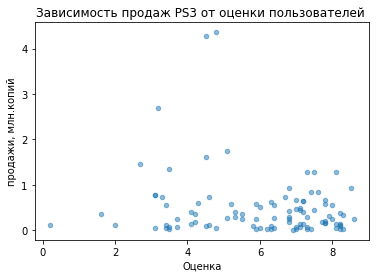

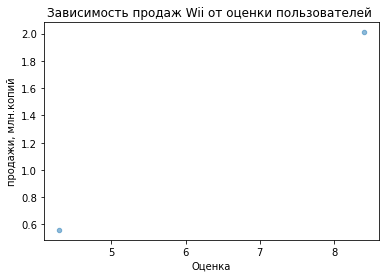

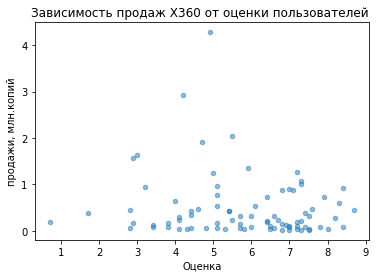

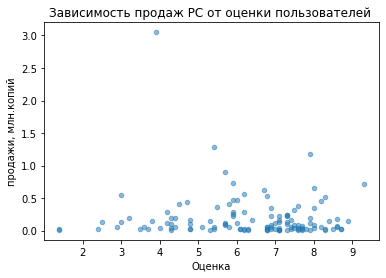

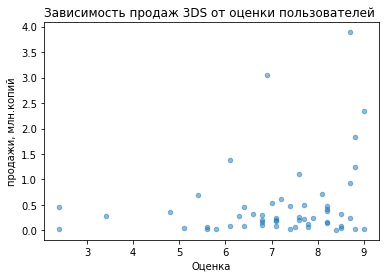

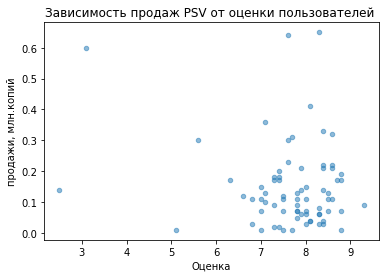

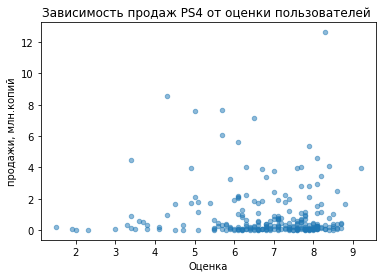

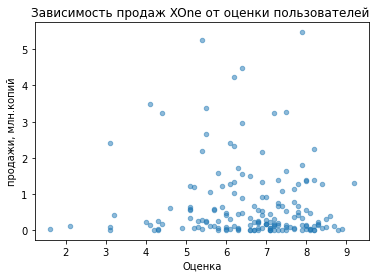

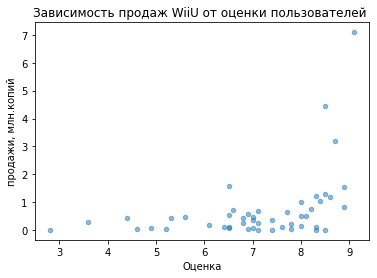

In [239]:
for name in actual_consol_corr['platform']:
    data_actual.query('platform == @name').plot(x='user_score', 
                                              y='total_sales', 
                                              kind='scatter',
                                              alpha=0.5,
                                              title=f'Зависимость продаж {name} от оценки пользователей ').set(
                                              xlabel='Оценка', 
                                              ylabel='продажи, млн.копий');
    

Можно заметить, что самая высокая плотность рассеивания у PS4, XOne и WiiU. Также видны выбросы с очень большим кол-вом продаж

Посмотрим эти же диаграммы для оценок критиков

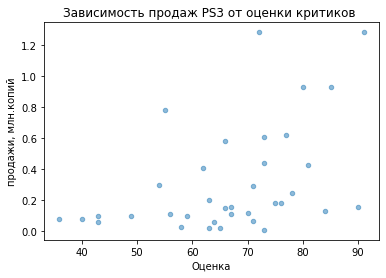

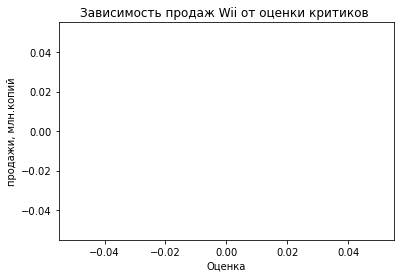

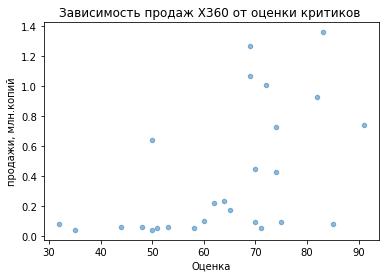

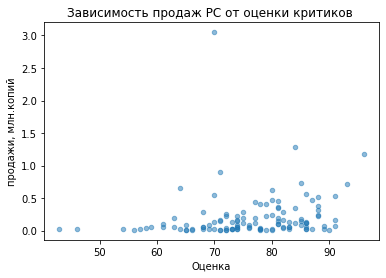

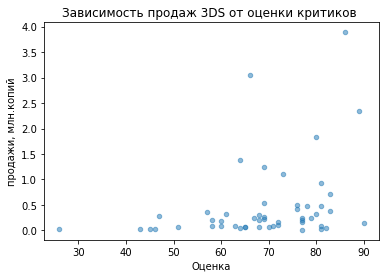

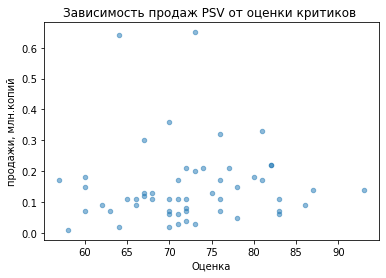

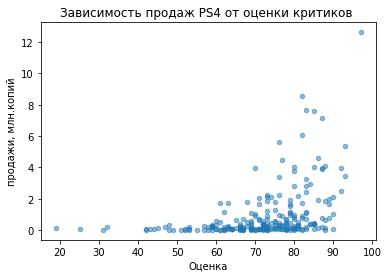

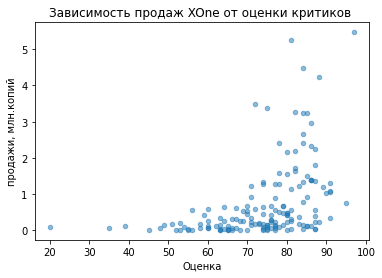

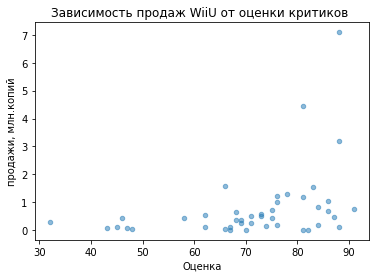

In [142]:
for name in actual_consol_corr['platform']:
    data_actual.query('platform == @name').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5,
                       title=f'Зависимость продаж {name} от оценки критиков ').set(
                       xlabel='Оценка', ylabel='продажи, млн.копий');
    

На данных диаграммах, наблюдается тенденция зависимости кол-ва продаж от оценки критиков. И также есть всплески

Вывод: зависимость действительно есть, как от оценок пользователей, так и оценок критиков. Но она не сильная и сконцентрирована только на некоторых консолях.Лучше всего это видно на примере XOne и PS4

Рассмотрим распределение игр по жанрам, относительно актуальных консолей

In [240]:
# по актуальным платформам
genre_pivot_total = data_actual.query('platform in @actual_consol').pivot_table(
                                                                                index='genre', 
                                                                                columns = 'platform',
                                                                                values = 'total_sales', aggfunc = 'max').sum(
                                                                                axis = 1).sort_values(ascending=False)
genre_pivot_total

genre
Shooter         36.37
Action          28.08
Role-Playing    28.05
Sports          21.40
Misc            19.28
Fighting        17.56
Racing          12.71
Platform         8.23
Simulation       7.48
Adventure        5.46
Puzzle           1.78
Strategy         1.34
dtype: float64

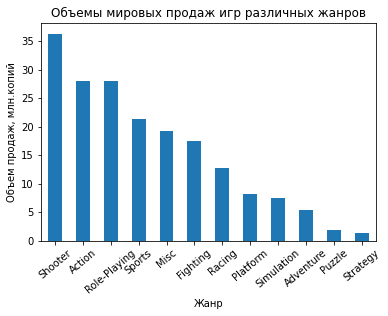

In [241]:
# построим диаграмму
genre_pivot_total.plot.bar(rot=40).set(
                                       title = 'Объемы мировых продаж игр различных жанров',
                                       xlabel = "Жанр", 
                                       ylabel = "Объем продаж, млн.копий" );

Самая большая доля продаж у экшенов, шутеров и ролевых игр. Они формируют половину продаж продаж среди поплярных консолей.

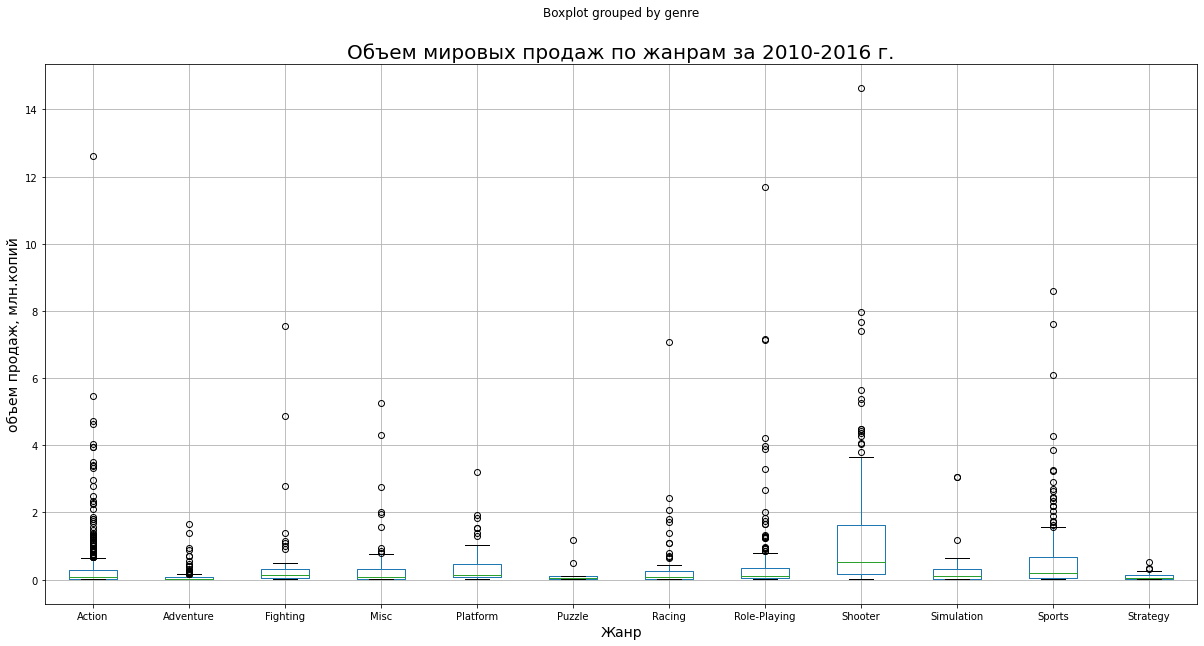

In [261]:
# общие продажи по платформам

data_actual.query('platform in @actual_consol').boxplot(
                column='total_sales', by='genre', figsize=(20, 10))
plt.title('Объем мировых продаж по жанрам за 2010-2016 г.', size=20)
plt.xlabel('Жанр', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()

In [262]:
# срез объема продаж
data_actual.query('platform in @actual_consol').pivot_table(
                       index='year_of_release', columns = 'genre', 
                       values = 'total_sales', aggfunc = 'sum')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,97.15,5.52,15.85,23.36,8.81,1.49,16.66,45.62,65.21,5.58,45.06,0.98
2015,71.90,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


In [263]:
# медиана продаж
data_actual.query('platform in @actual_consol').pivot_table(
                       index='year_of_release', columns = 'genre', 
                       values = 'total_sales', aggfunc = 'median')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,0.210,0.05,0.130,0.175,0.83,0.050,0.17,0.110,0.660,0.120,0.46,0.060
2015,0.075,0.03,0.100,0.190,0.10,0.045,0.15,0.105,0.925,0.200,0.12,0.045
2016,0.050,0.02,0.085,0.040,0.10,0.010,0.05,0.120,0.240,0.025,0.12,0.060


In [264]:
# среднее продаж
data_actual.query('platform in @actual_consol').pivot_table(
                       index='year_of_release', columns = 'genre', 
                       values = 'total_sales', aggfunc = 'mean')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,0.525135,0.077746,0.689130,0.584000,0.881000,0.212857,0.617037,0.512584,1.387447,0.507273,0.850189,0.122500
2015,0.287600,0.151111,0.376190,0.296667,0.465385,0.118333,0.448333,0.482564,1.985588,0.377333,0.692203,0.115625
2016,0.169157,0.068214,0.279375,0.081250,0.215333,0.010000,0.116250,0.336667,0.813191,0.105000,0.489375,0.086923


Из данных срезов можно увидеть плавный спад на последних 3 годах по всем жанрам

Сделаем срез за последние 4 года, чтобы увидеть популярные жанры в условиях спада

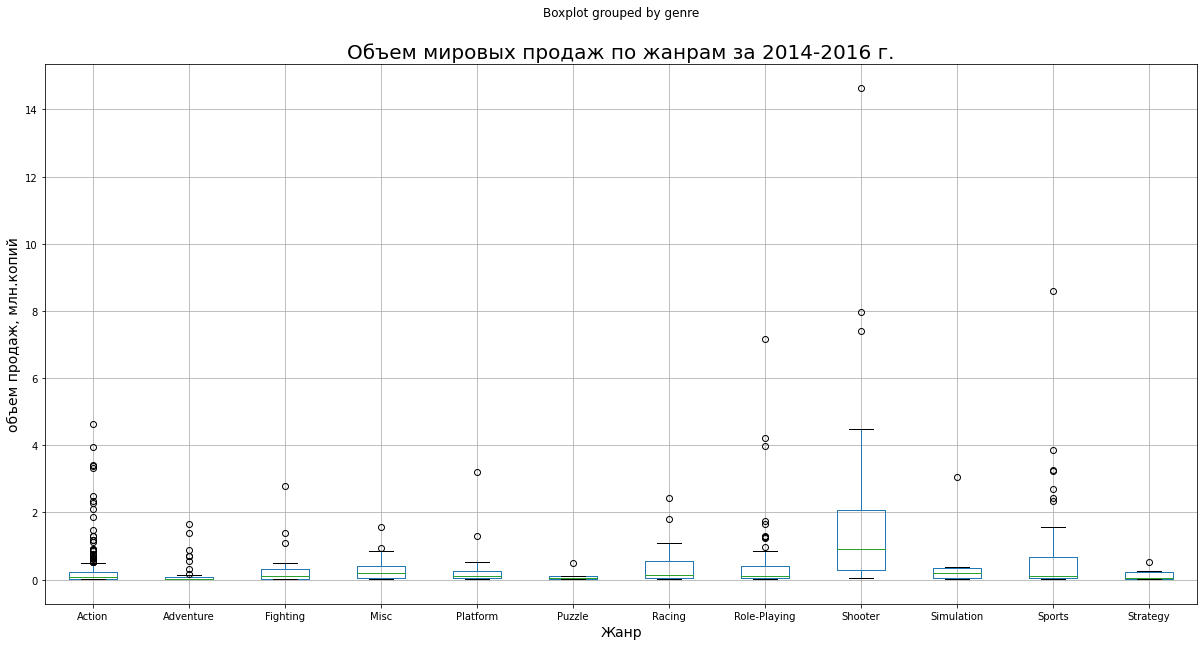

In [265]:
data_actual.query('platform in @actual_consol and 2014 < year_of_release < 2016' ).boxplot(
                                                                                            column='total_sales', 
                                                                                            by='genre', 
                                                                                            figsize=(20, 10)
                                                                                            )
plt.title('Объем мировых продаж по жанрам за 2014-2016 г.', size=20)
plt.xlabel('Жанр', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()

Рассмотрим ближе область медианы

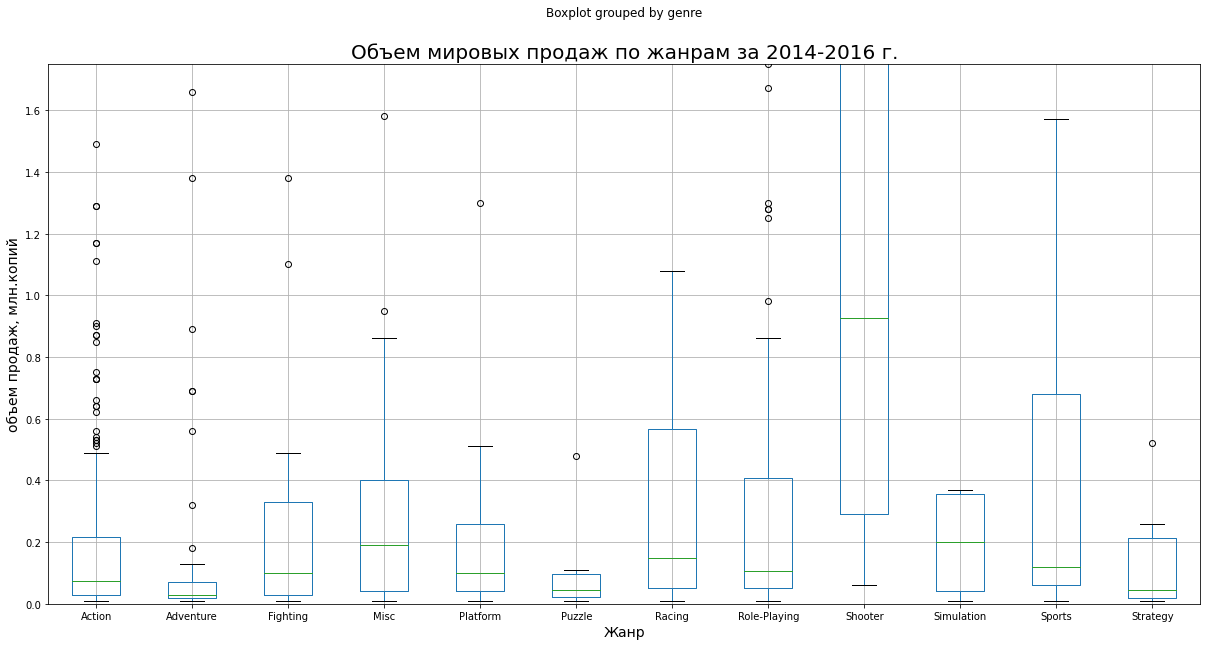

In [266]:
data_actual.query('platform in @actual_consol and 2014 < year_of_release < 2016' ).boxplot(
                column='total_sales', by='genre', figsize=(20, 10)).set(ylim = (0, 1.75))
plt.title('Объем мировых продаж по жанрам за 2014-2016 г.', size=20)
plt.xlabel('Жанр', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()

Вывод: можно выделить жанры, короые имеют популярность среди пользователей
- Action
- Shooter
- Sports
- Role-Playing
Жанр Action очень не стабилен и имеет достаточно много вбросов, то есть живет за счет небольшого кол-ва очень популярных игр

Вывод по 3 разделу: 
- Средний срок жизни консоли 10 лет. Так же наблюдается популярность в первые 4-5 лет, далее спад.
- Самые популярные консоли за исследуемый период: PS2, X360, PS3, XOne, Wii, DS
- Рынок начал набирать свою популярность в 1990, пик наблюдаелся в 2008-2009 годах. Дальше наблюдался спад в связи перенасыщением игр и возрастающими требованиями потребителей. Никто не хочет играть в сырые и недоработанные игры.
- Зависимость между оценками критиков, пользователей относительно продаж есть. Но она не сильная и скорее влияет на новых игроков
- В абсолютном выражении по продажам за 7 лет лидируют жанры Action, Shooter, Sports, Role-Playing и Misc, и совсем не пользуются популярностью Adventure, Strategy и Puzzle
- Для прогноза будут использоваться самые стабильные жанры: Shooter, Sports и Role-Playing

### Портрет каждого пользователя по регионам

Определим наиболее популярные консоли в представленных регионах

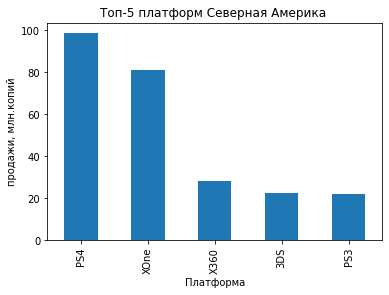

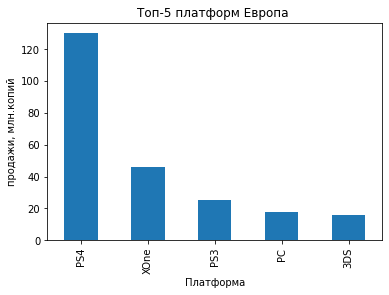

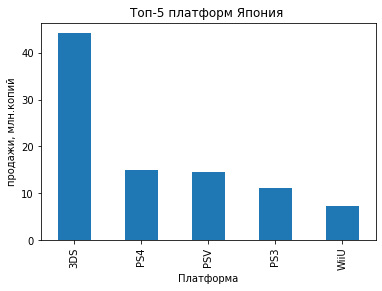

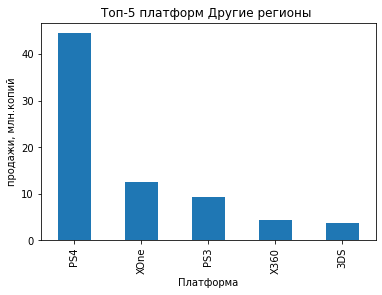

In [267]:
# делаем словарь с регионами
regions = {'na_sales': 'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония', 'other_sales':'Другие регионы'}

for name in regions:
    data_actual.query('platform in @actual_consol').pivot_table(index='platform', 
                                                                values = name, 
                                                                aggfunc = 'sum').sum(
                                    axis = 1).sort_values(ascending=False).head(5).plot(kind='bar',
                                    title=f'Топ-5 платформ {regions[name]} ').set(
                                    xlabel='Платформа', ylabel='продажи, млн.копий');
    plt.show()

Далее посмотрим на продажи по регионам

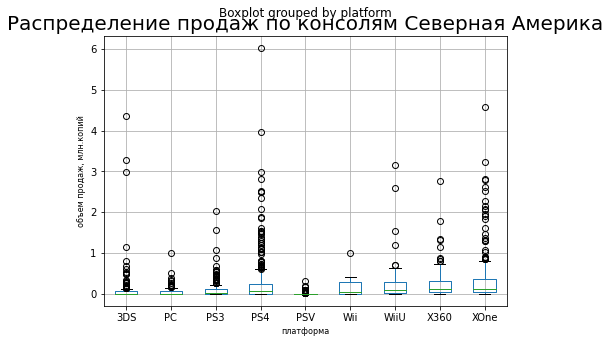

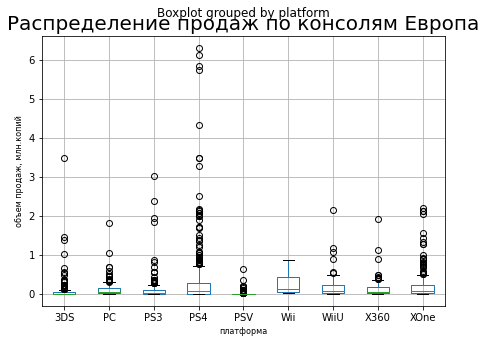

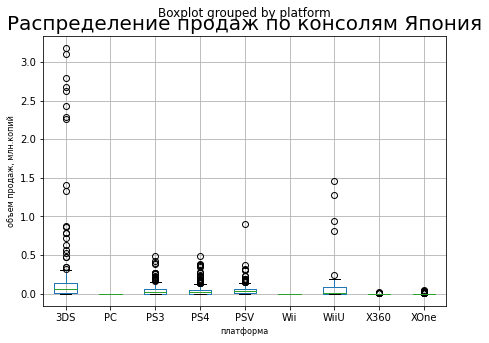

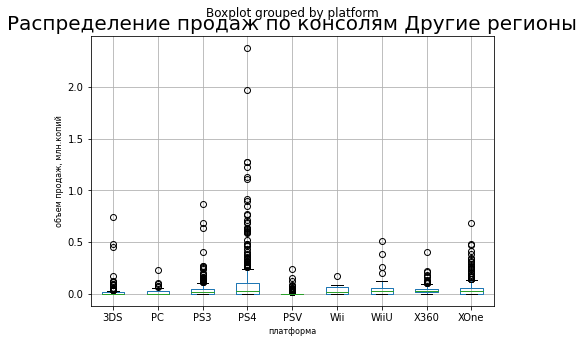

In [268]:
for name in regions:
    data_actual.query('platform  in @actual_consol').boxplot(column= name, by='platform', figsize=(7,5))
    
    plt.title(f'Распределение продаж по консолям {regions[name]}', size=20)
    plt.xlabel('платформа', size=8)
    plt.ylabel('объем продаж, млн.копий', size=8)
    plt.show()

Рассмотрим поближе, чтобы увидеть медиану

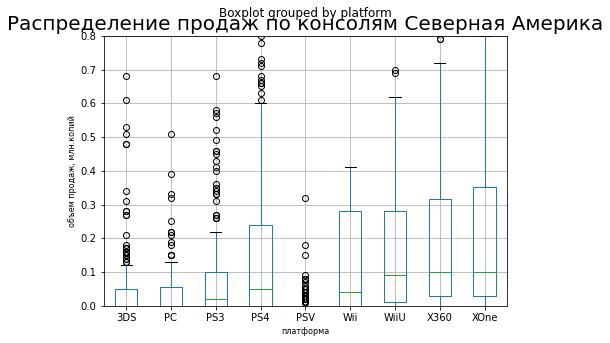

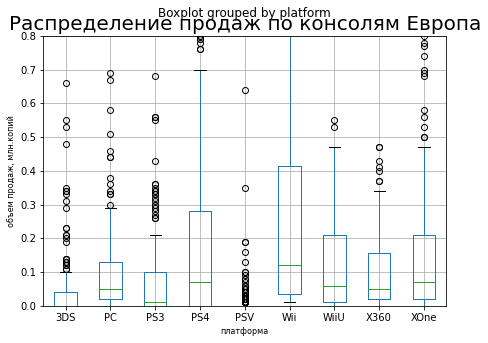

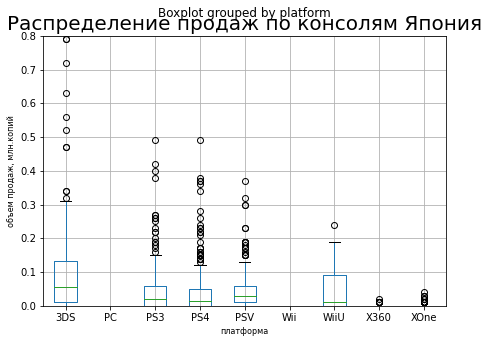

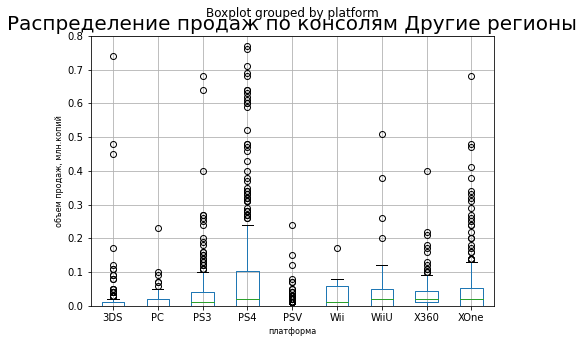

In [269]:
for name in regions:
    data_actual.query('platform  in @actual_consol').boxplot(column= name, by='platform', figsize=(7,5))
    
    plt.ylim(0, 0.8)
    plt.title(f'Распределение продаж по консолям {regions[name]}', size=20)
    plt.xlabel('платформа', size=8)
    plt.ylabel('объем продаж, млн.копий', size=8)
    plt.show()

Довольно ожидаемо, что Sony и Microsoft являются лидерами в америке и европе. А nintendo, лидирует в азиатском.

Самые популярные жанры в регионах

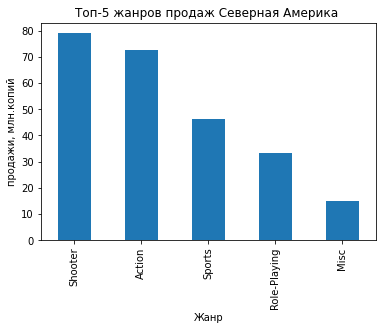

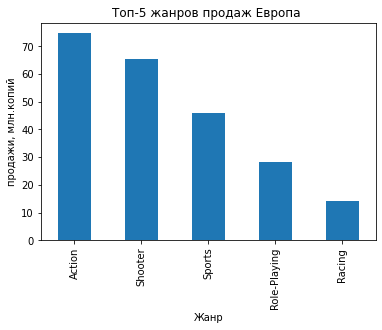

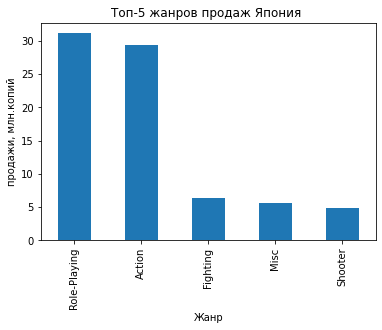

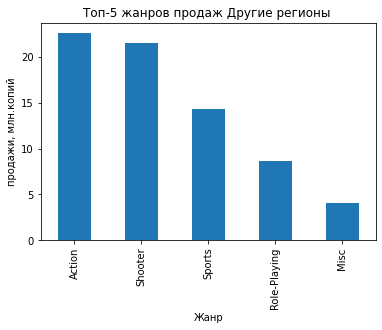

In [270]:
# группируем по жанрам и регионам
for name in regions:
    data_actual.query('platform in @actual_consol').pivot_table(index='genre', 
                                                                values = name, 
                                                                aggfunc = 'sum').sum(
                                     axis = 1).sort_values(ascending=False).head(5).plot(kind='bar',
                                     title=f'Топ-5 жанров продаж {regions[name]} ').set(
                                     xlabel='Жанр', ylabel='продажи, млн.копий');
    plt.show()

Самые популярные жанры практически во всех регионах Action, Shooter, Sports, Role-Playing и Misc. Однако, в Азиатском регионе в топ 5 находится Role-Playing

Влияние рейтинга ESRB на продажи в регионах

In [271]:
# создадим словарь, для расшифровки и удобства построения графиков
rating_dict = [{
'EC':'EC (3+)',
'E':'E (6+)',
'E10+':'E (10+)',   
'T':'T (13+)',
'M':'M (17+)',
'AO':'AO (только для взрослых)',
'K-A':'E (6+ до 1998 года)',
'RP':'Рейтинг ожидается',
'no rating':'Рейтинг не определен'
}]

In [272]:
# добавим в data_actual столбец с расшифровкой
rating = pd.DataFrame(rating_dict).transpose().reset_index()
rating.columns = ['rating','description']


data_actual = data_actual.merge(rating)
data_actual.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,description
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63,Рейтинг не определен
1,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68,Рейтинг не определен
2,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98,Рейтинг не определен
3,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,no rating,7.55,Рейтинг не определен
4,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,no rating,7.39,Рейтинг не определен


In [273]:
# посмотрим значения
data_actual['description'].value_counts()

Рейтинг не определен    749
T (13+)                 271
M (17+)                 265
E (6+)                  219
E (10+)                 185
Name: description, dtype: int64

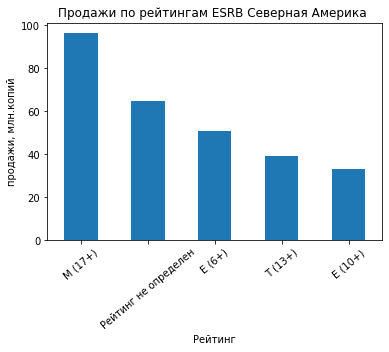

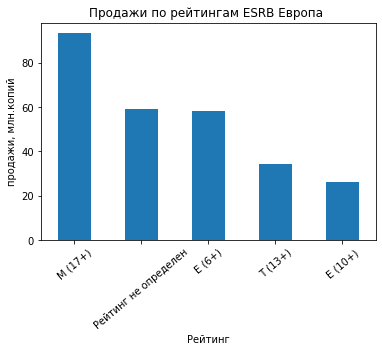

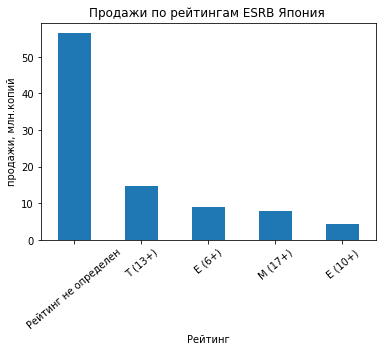

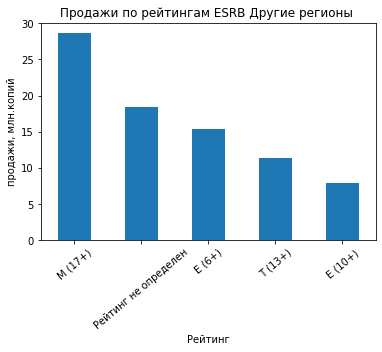

In [274]:
for name in regions:
    data_actual.query('platform in @actual_consol').pivot_table(index='description', values = name, aggfunc = 'sum').sum(
                                     axis = 1).sort_values(ascending=False).plot(kind='bar', rot=40,
                                     title=f'Продажи по рейтингам ESRB {regions[name]} ').set(
                                     xlabel='Рейтинг', ylabel='продажи, млн.копий');
    plt.show()

Посмотрим кол-во продаж по каждому рейтингу

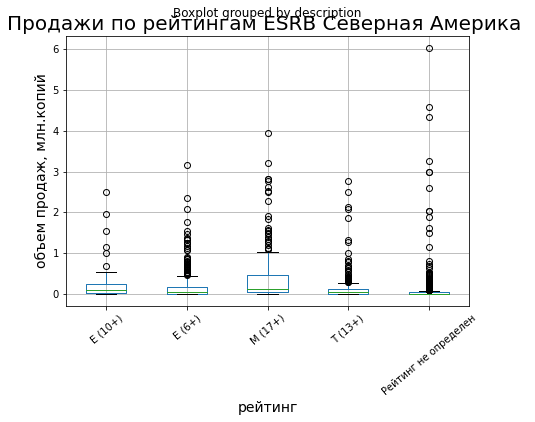

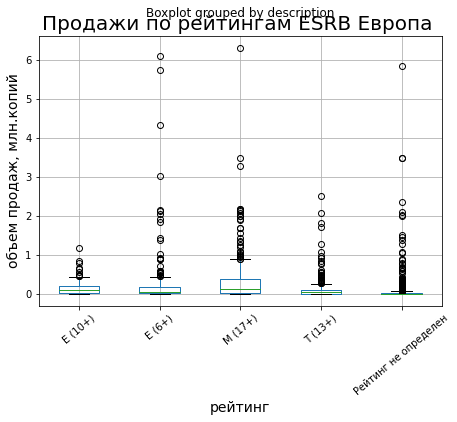

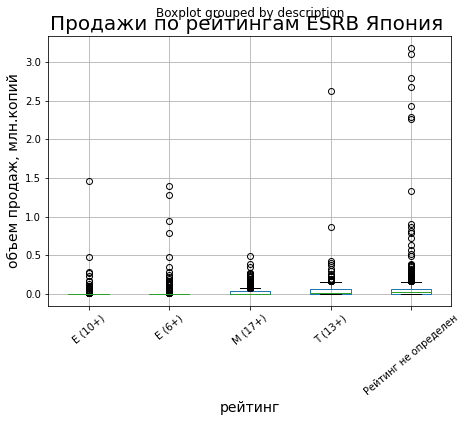

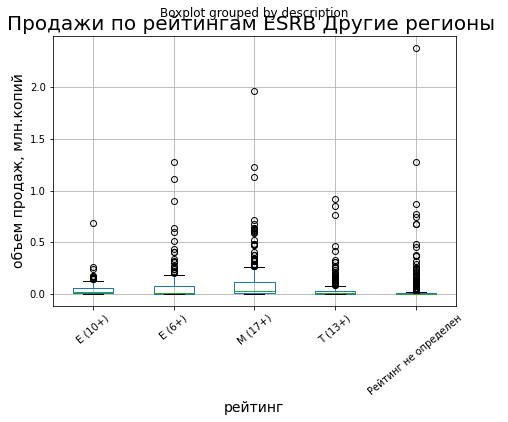

In [275]:
for name in regions:
    data_actual.query('platform in @actual_consol').boxplot(
                                                           column= name, 
                                                           by='description', 
                                                           figsize=(7,5),
                                                           rot=40)
    
    plt.title(f'Продажи по рейтингам ESRB {regions[name]} ', size=20)
    plt.xlabel('рейтинг', size=14)
    plt.ylabel('объем продаж, млн.копий', size=14)
    plt.show()

А также область медианы

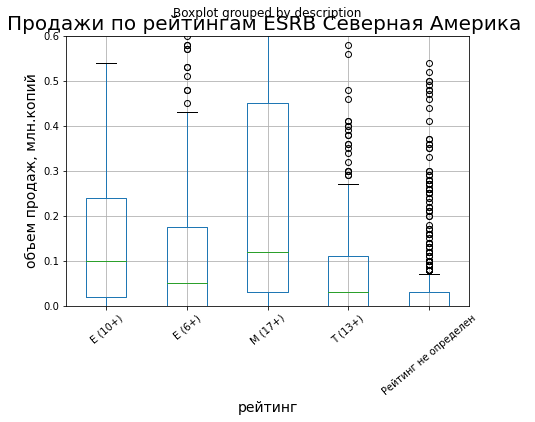

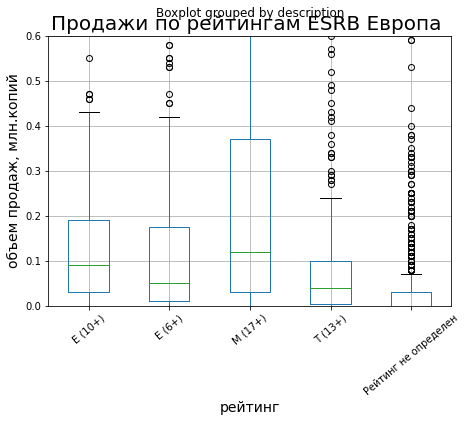

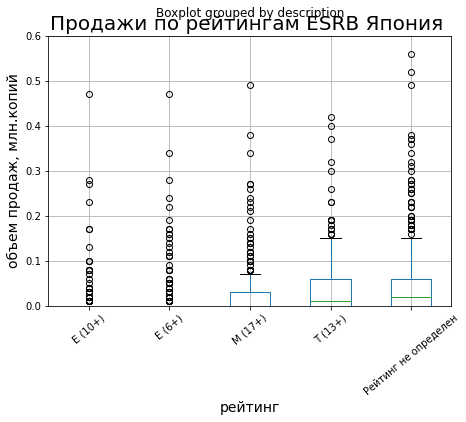

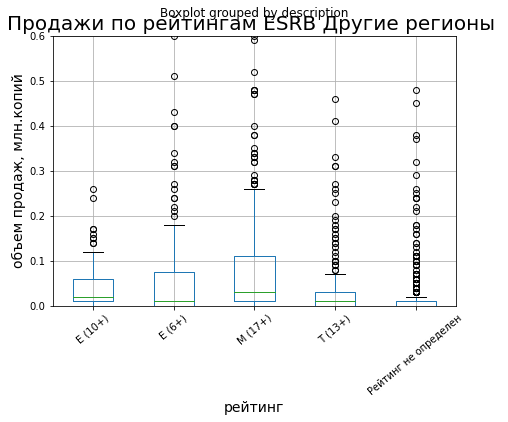

In [276]:
for name in regions:
    data_actual.query('platform in @actual_consol').boxplot(
                                                           column= name, 
                                                           by='description', 
                                                           figsize=(7,5),
                                                           rot=40)
    
    plt.title(f'Продажи по рейтингам ESRB {regions[name]} ', size=20)
    plt.ylim(0, 0.6)
    plt.xlabel('рейтинг', size=14)
    plt.ylabel('объем продаж, млн.копий', size=14)
    plt.show()

Чаще всего в топах встречается рейтинг 17+, потому что в основном на эту аудиторию расчитаны игры. В японии у большинства игр рейтинг не определен. Во избежании судебных исков и проблем с выпуском в стране. По медианам 1 место также 17+, но в других случаях можно заметить, что некоторые рейтинги популярны только за счет выпуска пары супер хитов. Например 13+.
В основном все объемы продаж сформированны выбросами. Так же наблюдается довольно старнное поведение рейтинга 6+

Таким образом, Азия довольно непредсказуемый регион. В основном преобладает рейтинг 17+, и по медиане видно что многие игры пользователям не зашли. Но видно, что больше всего денег, приносят игры 17+

Вывод по 4 разделу:
- Игровые тенденции делятся на 2 типа. Если Европа, Америка и др. регионы более менее похожи по играм, выборам консолей и тд. То Япония это отдельный рынок, там свои тренды и правила. Если большинство студий по производству игр, хотят продасться крупным игрокам. То японские игровые компании работают только на свой рынок.
- В топе Xbox и PS, а также Wii. 
- Самые популярные жанры практически во всех регионах -Action, Shooter, Sports, Role-Playing и Misc. В Японии на первом месте стоят продажи Role-Playing, Action и Misc.
- Японский рынок отличается и по рейтинговым предпочтениям, основную прибыль приносят игры без рейтинга

### Проверка гипотез

Для проверки гипотез сравним данные за актуальный период, которые сохранены в переменной data_actual.
Для анализа будем использовать t-критерий Стьюдента, поскольку сравниваемые выборки независимы между собой.
Поскольку оценки имеют фиксированные шкалы, удалять выбросы не будем, но очистим данные от пропусков.

Сформулируем гипотезы:

- Н0: средние пользовательские рейтинги платформ Xbox One и PC равны
- Н1: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [277]:
#выборки пользовательских рейтингов по платформам, очищенные от пропусков:
test_XOne = data_actual.query('platform == "XOne" and user_score.notna()')['user_score']
test_PC = data_actual.query('platform == "PC" and user_score.notna()')['user_score']

In [278]:
alpha = .05
results = st.ttest_ind(test_PC,test_XOne)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348298
Не получилось отвергнуть нулевую гипотезу


Значимых различий между рейтингами нет, то есть гипотеза не опровергнута

Сформулируем гипотезы:

- Н0: средние пользовательские рейтинги жанров Action и Sport равны
- Н1: средние пользовательские рейтинги жанров Action и Sport не равны

In [279]:
test_action = data_actual.query('genre == "Action" and user_score.notna()')['user_score']
test_sports = data_actual.query('genre == "Sports" and user_score.notna()')['user_score']

In [280]:
alpha = 0.05
results = st.ttest_ind(test_action, test_sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.871114798510978e-19
Отвергаем нулевую гипотезу


Гипотеза подтвердилась, таким образом, средние пользовательские рейтинги действительно разные

Вывод по разделу 5: явных отличий между рейтингами Xbox и PC нет. А средние пользовательские рейтинги Action и Sports приблизительно равны.

### Общий вывод

В результате предобработки данных:
- были приведены столбцы к нижнему регистру
- проверены пропуски
- изменены типы данных
- заменены значения user_score tbd
- сохранены суммарные продажи в total_sales

В результате анализа:
- средний срок жизни консоли 10 лет. Так же наблюдается популярность в первые 4-5 лет, далее спад.
- самые популярные консоли за исследуемый период: PS2, X360, PS3, XOne, Wii, DS
- рынок начал набирать свою популярность в 1990, пик наблюдаелся в 2008-2009 годах. Дальше наблюдался спад в связи перенасыщением игр и возрастающими требованиями потребителей. Никто не хочет играть в сырые и недоработанные игры.
- зависимость между оценками критиков, пользователей относительно продаж есть. Но она не сильная и скорее влияет на новых игроков
- в абсолютном выражении по продажам за 3 года лидируют жанры Action, Shooter, Sports, Role-Playing и Misc, и совсем не пользуются популярностью Adventure, Strategy и Puzzle
- для прогноза будут использоваться самые стабильные жанры: Shooter, Sports и Role-Playing

Портреты пользователей:
- игровые тенденции делятся на 2 типа. Если Европа, Америка и др. регионы более менее похожи по играм, выборам консолей и тд. То Япония это отдельный рынок, там свои тренды и правила. Если большинство студий по производству игр, хотят продасться крупным игрокам. То японские игровые компании работают только на свой рынок.
- в топе Xbox и PS, а также Wii.
- самые популярные жанры практически во всех регионах -Action, Shooter, Sports, Role-Playing и Misc. В Японии на первом месте стоят продажи Role-Playing, Action и Misc.
- японский рынок отличается и по рейтинговым предпочтениям, основную прибыль приносит рейтинг 6+

Гипотезы:
- явных отличий между рейтингами Xbox и PC нет. А средние пользовательские рейтинги Action и Sports приблизительно равны.